In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd

线性回归之前先对数据进行无量纲化

fit_intercept: 是否计算次模型的截距，默认为True    
normalize: 减去均值再除以L2范式，默认False，不想用之则启用preprocessing中的StandardScaler   
copy_X: 默认True，如果为真，将在X.copy（）上操作   
n_jobs: 输入为-1，表示使用全部CPU来进行计算。

In [2]:
housevalue = fch() #会需要下载，大家可以提前运行试试看

In [3]:
X = pd.DataFrame(housevalue.data) #放入DataFrame中便于查看
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y = housevalue.target

In [5]:
y.min()

0.14999

In [6]:
y.max()

5.00001

In [7]:
X.shape

(20640, 8)

In [8]:
y.shape

(20640,)

In [9]:
housevalue.feature_names  # 特征的名字

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
X.columns = housevalue.feature_names
"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
"""

'\nMedInc：该街区住户的收入中位数\nHouseAge：该街区房屋使用年代的中位数\nAveRooms：该街区平均的房间数目\nAveBedrms：该街区平均的卧室数目\nPopulation：街区人口\nAveOccup：平均入住率\nLatitude：街区的纬度\nLongitude：街区的经度\n'

In [11]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [12]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [14]:
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [15]:
Xtrain.shape

(14448, 8)

In [16]:
#如果希望进行数据标准化，还记得应该怎么做吗？
#先用训练集训练标准化的类，然后用训练好的类分别转化训练集和测试集

In [17]:
reg = LR().fit(Xtrain, Ytrain)

In [18]:
yhat = reg.predict(Xtest)

In [19]:
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [20]:
yhat.min()

-0.6528439725035824

In [21]:
yhat.max()

7.146198214270839

属性接口：   
.coef_ ---调用系数   
.intercept_ --- 调用截距

In [22]:
reg.coef_  # w，系数向量      （线性回归方程中估计出来的系数）

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [23]:
[*zip(Xtrain.columns,reg.coef_)]  #进行匹配的对象，里面是一个惰性对象，用*zip打开

[('MedInc', 0.4373589305968401),
 ('HouseAge', 0.010211268294493672),
 ('AveRooms', -0.10780721617317635),
 ('AveBedrms', 0.6264338275363786),
 ('Population', 5.21612535341231e-07),
 ('AveOccup', -0.0033485096463336797),
 ('Latitude', -0.413095937894771),
 ('Longitude', -0.42621095362084827)]

In [ ]:
"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude:街区的经度
"""

In [24]:
reg.intercept_  # 数组，线性回归中的截距项

-36.256893229204074

回归类模型的评估指标

在sklearn当中，我们有两种方式调用这个评估指标，一种   
是使用sklearn专用的模型评估模块metrics里的类mean_squared_error，   
另一种是调用交叉验证的类cross_val_score并使用里面的scoring参数   
来设置使用均方误差。

In [25]:
from sklearn.metrics import mean_squared_error as MSE

In [26]:
MSE(yhat,Ytest)

0.5309012639324571

In [27]:
Ytest.mean()  # 平均出错25%左右

2.0819292877906976

In [28]:
y.max()

5.00001

In [29]:
y.min()

0.14999

In [64]:
# cross_val_score(reg,X,y,cv=10,scoring="mean_squared_error") #为什么报错了？来试试看！

In [30]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [31]:
cross_val_score(reg,X,y,cv=10,scoring="neg_mean_squared_error")*(-1)

array([0.48922052, 0.43335865, 0.8864377 , 0.39091641, 0.7479731 ,
       0.52980278, 0.28798456, 0.77326441, 0.64305557, 0.3275106 ])

评估指标用：负的均方误差，sklean中所有的损失都用负数来使用

R方：1 - RSS/方差   
RSS是真实值和预测值之差的差值，也就是我们的模型没有捕获到的信息总量   
分母是真是标签所带的信息量   
故R方衡量的是：1 - 我们的模型没有捕获到的信息量占真实标签中所带的信息量的比例。R方越接近1越好。

R方可以使用三种方式来调用：   
一种是直接从metrics中导入r2_score，输入预测值和真实值后打分。   
第二种是直接从线性回归LinearRegression的接口score来进行调用。   
第三种是在交叉验证中，输入"r2"来调用。

回归问题中，score的默认接口都是R方

In [32]:
#调用R2
from sklearn.metrics import r2_score

In [33]:
r2_score(yhat,Ytest)   # 有60%的信息量都没有被捕捉到

0.3380653761555984

In [34]:
r2 = reg.score(Xtest,Ytest)    # Linear Regression 的score接口
r2

0.6043668160178817

线性回归模型评估第二大坑：不同的评估指标不同的结果

In [35]:
r2_score(Ytest,yhat)   # 真实值在前，预测值在后

0.6043668160178817

In [36]:
# 或者直接指定参数，就不必指定参数了
r2_score(y_true = Ytest,y_pred = yhat)

0.6043668160178817

In [37]:
cross_val_score(reg,X,y,cv=10,scoring="r2").mean()

0.5110068610524556

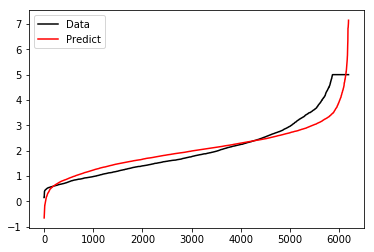

In [39]:
import matplotlib.pyplot as plt
sorted(Ytest)

plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label="Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label="Predict")
plt.legend()
plt.show()

虽然在有限数据集上将数值预测正确了，但却没有正确拟合数据的分布，MSE看起来不是   
非常大，但是我们的R方却不高的原因因此R方才是我们衡量回归类评估指标的第一评估指标。

In [40]:
import numpy as np
rng = np.random.RandomState(42) 
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-179.11480837,   -5.70837982,  -15.38196168,  -77.07714165,
        -61.98484963])

线性回归的三号大坑：负的R方

多重共线性：岭回归和Lasso

在机器学习中，我们可以使用模型来判断——如果一个数据集在岭回归中使用各种正则化参数取值下模型表现没有明显上升（比如出现持平或者下降），则说明数据没有多重共线性，顶多是特征之间有一些相关性。反之，如果一个数据集在岭回归的各种正则化参数取值下表现出明显的上升趋势，则说明数据
存在多重共线性。

多重共线性是一种统计现象，是指线性模型中的特征（解释变量）之间由于存在精确相关关系或高度相关关系，
多重共线性的存在会使模型无法建立，或者估计失真。

相关性是衡量两个或多个变量一起波动的程度的指标，它可以是正的，负的或者0。当我们说变量之间具有相关
性，通常是指线性相关性，线性相关一般由皮尔逊相关系数进行衡量，非线性相关可以使用斯皮尔曼相关系数或
者互信息法进行衡量。

In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [43]:
housevalue = fch()

In [45]:
X = pd.DataFrame(housevalue.data) 
y = housevalue.target

In [46]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [47]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [48]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420) #数据集索引恢复

In [49]:
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [50]:
Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [51]:
#使用岭回归来进行建模
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest) 

0.6043610352312279

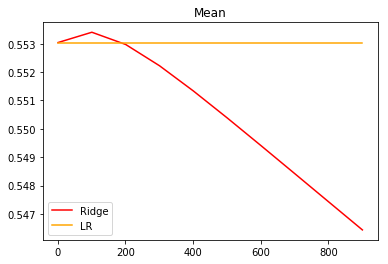

In [52]:
#交叉验证下，与线性回归相比，岭回归的结果如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

In [59]:
#使用岭回归来进行建模
reg = Ridge(alpha=80).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest) 

0.6037290070912724

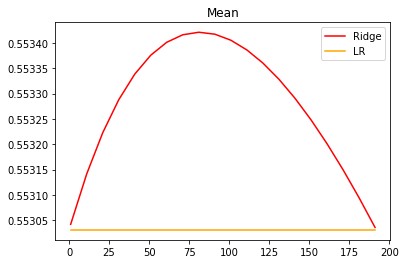

In [58]:
#细化一下学习曲线
alpharange = np.arange(1,201,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

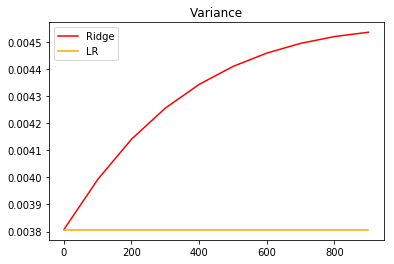

In [60]:
#模型方差如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

虽然岭回归和Lasso不是设计来提升模型表现，而是专注于
解决多重共线性问题的，但当 在一定范围内变动的时候，消除多重共线性也许能够一定程度上提高模型的泛化能
力。

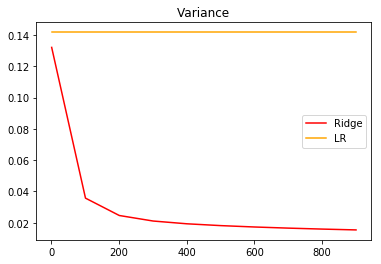

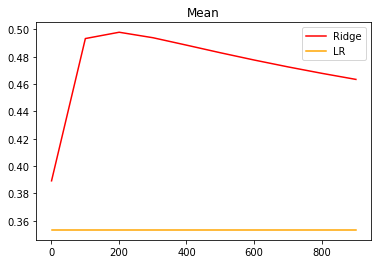

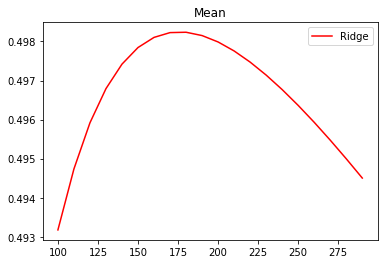

In [61]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
X = load_boston().data
y = load_boston().target
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420) #先查看方差的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()
#查看R2的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()
#细化学习曲线
alpharange = np.arange(100,300,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    #linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    #linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
#plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

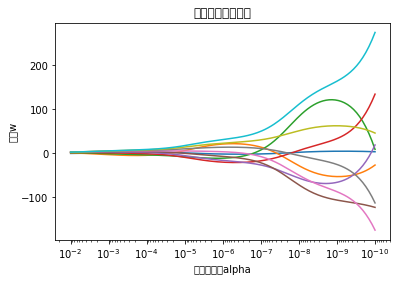

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#创造10*10的希尔伯特矩阵
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10) 

#计算横坐标
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

#建模，获取每一个正则化取值下的系数组合
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_) 

#绘图展示结果
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) 

#将横坐标逆转
plt.xlabel('正则化参数alpha')
plt.ylabel('系数w')
plt.title('岭回归下的岭迹图')
plt.axis('tight')
plt.show()

岭迹图--交叉越多，多重贡献性越高，应该选择喇叭口，平稳的喇叭口所对应的alpta取值作为最佳正则化参数的取值。

在2000年以后，岭迹图只是教学中会被略微提到的一个知识点（还会被强调是过时的技术），在现实中，真正   
应用来选择正则化系数的技术是交叉验证，并且选择的标准非常明确——我们选择让交叉验证下的均方误差最小   
的正则化系数 。

在sklearn中，我们有带交叉验证的岭回归可以使用

参数：   
alphas---返回一个元组   
cv----默认None，留一交叉验证，仅仅为None时，每次交叉验证的结果才能被保存下来   
scoring---默认R方，可调整   
store_cv_values----是否保存每次交叉验证的结果，默认False   
属性：   
alpha_---查看交叉验证选中的alpha   
cv_values_---调用所有交叉验证的结果，只有当store_cv_values = True时才能够调用，因此返回的结构是（n_samples,n_alphas）   
重要接口：   
score：---调用Ridge类不进行交叉验证的情况下返回的R方

In [64]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [65]:
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [67]:
Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
                #,scoring="neg_mean_squared_error"
                 ,store_cv_values=True
                #,cv=5
                ).fit(X, y)

In [68]:
#无关交叉验证的岭回归结果
Ridge_.score(X,y) 

0.6060251767338442

In [69]:
#调用所有交叉验证的结果
Ridge_.cv_values_.shape

(20640, 10)

In [70]:
#进行平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge_.cv_values_.mean(axis=0) 

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [71]:
#查看被选择出来的最佳正则化系数
Ridge_.alpha_

101

Lasso(最小绝对收缩合选择算子）：用来作用于多重共线性问题的算法，使用系数w的L1范式，乘以系数alpha

岭回归可以解决特征间的精确相关关系导致的最小二乘法无法使用的问题，而Lasso不行。

Lasso不是从根本上解决多重共线性问题，而是限制多重共线性带来的影响。

L2正则化只会将系数压缩到尽量接近0，但L1正则化主导稀疏性，因此会将系数压缩到0。这个性质，
让Lasso成为了线性模型中的特征选择工具首选。

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [2]:
housevalue = fch()

In [3]:
X = pd.DataFrame(housevalue.data)
y = housevalue.target

In [4]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [5]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420) #恢复索引
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [7]:
#线性回归进行拟合
reg = LinearRegression().fit(Xtrain,Ytrain) 
(reg.coef_*100).tolist()

[43.73589305968401,
 1.0211268294493672,
 -10.780721617317635,
 62.64338275363785,
 5.2161253534123096e-05,
 -0.33485096463336794,
 -41.3095937894771,
 -42.62109536208483]

In [8]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.73589305968398,
 1.0211268294494116,
 -10.78072161731758,
 62.643382753637276,
 5.2161253532697085e-05,
 -0.33485096463335795,
 -41.3095937894769,
 -42.62109536208446]

In [9]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[43.73589305968403,
 1.0211268294494056,
 -10.780721617317713,
 62.643382753638086,
 5.216125353268129e-05,
 -0.33485096463335795,
 -41.30959378947712,
 -42.6210953620847]

sklearn中的Lasso类不是使用最小二乘法来进行求解，而是使用坐标下降。

有了坐标下降，就有迭代和收敛的问题，因此sklearn不推荐我们使用0这样的正则化系数。   
如果我们的确希望取到0，那我们可以使用一个比较很小的数，比如0.01，或者 这样的值

Lasso对alpha非常非常的敏感，因此用它来做特征选择

In [11]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0.01).fit(Xtrain,Ytrain) 
(Ridge_.coef_*100).tolist()

[43.73575720621596,
 1.0211292318121803,
 -10.780460336251622,
 62.64202320775658,
 5.217068073242414e-05,
 -0.33485065170676187,
 -41.30957143229132,
 -42.62105388932396]

In [13]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0.01).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()

[40.10568371834486,
 1.0936292607860143,
 -3.7423763610244563,
 26.524037834897207,
 0.00035253685115039395,
 -0.3207129394887798,
 -40.06483047344844,
 -40.81754399163317]

In [14]:
#加大正则项系数，观察模型的系数发生了什么变化
Ridge_ = Ridge(alpha=10**4).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[34.62081517607693,
 1.5196170869238688,
 0.3968610529210192,
 0.9151812510354818,
 0.0021739238012248416,
 -0.34768660148100994,
 -14.736963474215269,
 -13.435576102526921]

In [15]:
lasso_ = Lasso(alpha=10**4).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [16]:
#看来10**4对于Lasso来说是一个过于大的取值
lasso_ = Lasso(alpha=1).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()

[14.581141247629423,
 0.6209347344423876,
 0.0,
 -0.0,
 -0.0002806598632900997,
 -0.0,
 -0.0,
 -0.0]

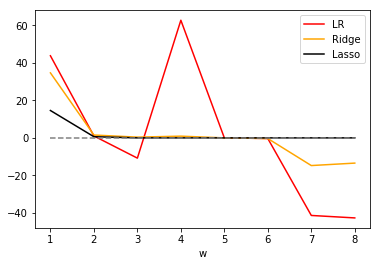

In [17]:
#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()

可见，比起岭回归，Lasso所带的L1正则项对于系数的惩罚要重得多，并且它会将系数压缩至0，因此可以被用来做   
特征选择。也因此，我们往往让Lasso的正则化系数 在很小的空间中变动，以此来寻找最佳的正则化系数。

选取正则化参数

Lasso参数：   
eps： alpha最小值比alpha最大值   
n_alphas: alpha的个数   
alphas:  alpha的元组，默认None，不输入的时候，自动使用eps和n_alphas来自动化生成交叉验证的正则化参数   
cv： 交叉验证次数   
   
属性：   
alpha_: 调用交叉验证选出来的最佳正则化参数   
alphas_: 使用正则化路径的长度和路径中alpha的个数来自动生成的，用来进行交叉验证的正则化参数   
mse_path: 返回所有交叉验证的结果细节   
coef_: 调用最佳正则化参数下建立的模型的系数

In [18]:
from sklearn.linear_model import LassoCV

In [19]:
#自己建立Lasso进行alpha选择的范围
alpharange = np.logspace(-10, -2, 200,base=10) 
#其实是形成10为底的指数函数
#10**(-10)到10**(-2)次方

In [20]:
alpharange.shape

(200,)

In [21]:
Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [22]:
lasso_ = LassoCV(alphas=alpharange #自行输入的alpha的取值范围
               ,cv=5 #交叉验证的折数
               ).fit(Xtrain, Ytrain)

In [23]:
#查看被选择出来的最佳正则化系数
lasso_.alpha_

0.0020729217795953697

In [24]:
#调用所有交叉验证的结果
lasso_.mse_path_

array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [25]:
lasso_.mse_path_.shape #返回每个alpha下的五折交叉验证结果

(200, 5)

In [26]:
lasso_.mse_path_.mean(axis=1) 
#有注意到在岭回归中我们的轴向是axis=0吗？
#在岭回归当中，我们是留一验证，因此我们的交叉验证结果返回的是，每一个样本在每个alpha下的交叉验证结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=0，跨行求均值
#而在这里，我们返回的是，每一个alpha取值下，每一折交叉验证的结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=1，跨列求均值
#最佳正则化系数下获得的模型的系数结果

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [27]:
lasso_.coef_

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [28]:
lasso_.score(Xtest,Ytest) #与线性回归相比如何？

0.6038982670571436

In [30]:
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest) 

0.6043668160178817

如果使用了Lasso和岭回归，他们的结果往往是比线性回归差一点点的

In [31]:
#使用lassoCV自带的正则化路径长度和路径中的alpha个数来自动建立alpha选择的范围
ls_ = LassoCV(eps=0.00001   # eps对模型的影响很大，往小了去找就行
             ,n_alphas=300
             ,cv=5
               ).fit(Xtrain, Ytrain)

In [32]:
ls_.alpha_

0.0020954551690628535

In [33]:
ls_.alphas_ #查看所有自动生成的alpha取值

array([2.94059737e+01, 2.82952253e+01, 2.72264331e+01, 2.61980122e+01,
       2.52084378e+01, 2.42562424e+01, 2.33400142e+01, 2.24583946e+01,
       2.16100763e+01, 2.07938014e+01, 2.00083596e+01, 1.92525862e+01,
       1.85253605e+01, 1.78256042e+01, 1.71522798e+01, 1.65043887e+01,
       1.58809704e+01, 1.52811004e+01, 1.47038891e+01, 1.41484809e+01,
       1.36140520e+01, 1.30998100e+01, 1.26049924e+01, 1.21288655e+01,
       1.16707233e+01, 1.12298864e+01, 1.08057012e+01, 1.03975388e+01,
       1.00047937e+01, 9.62688384e+00, 9.26324869e+00, 8.91334908e+00,
       8.57666619e+00, 8.25270079e+00, 7.94097249e+00, 7.64101907e+00,
       7.35239575e+00, 7.07467457e+00, 6.80744372e+00, 6.55030695e+00,
       6.30288297e+00, 6.06480491e+00, 5.83571975e+00, 5.61528779e+00,
       5.40318218e+00, 5.19908842e+00, 5.00270386e+00, 4.81373731e+00,
       4.63190858e+00, 4.45694804e+00, 4.28859627e+00, 4.12660362e+00,
       3.97072991e+00, 3.82074399e+00, 3.67642348e+00, 3.53755437e+00,
      

In [34]:
ls_.alphas_.shape

(300,)

In [35]:
ls_.score(Xtest,Ytest)

0.6038915423819201

In [36]:
ls_.coef_

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])

非线性问题：多项式回归

分类问题中的特征和标签一定是非线性关系

线性关系图不等于数据分布图

当我们在回归中绘制图像时，绘制的是特征与标签的关系图，横坐标是特征，纵坐标是标签，我们的标签是连续型的，   
所以我们可以通过是否能够使用一条直线来拟合图像判断数据究竟属于线性还是非线性。   
然而在分类中，我们绘制的是数据分布图，横坐标是其中一个特征，纵坐标是另一个特征，标签则是数据点的颜色。

总结一下，对于回归问题，数据若能分布为一条直线，则是线性的，否则是非线性。对于分类问题，数据分布若能使   
用一条直线来划分类别，则是线性可分的，否则数据则是线性不可分的。

线性模型：自变量都是一次项

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [38]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数

In [40]:
#生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3 #random.normal，生成size个服从正态分布的随机数

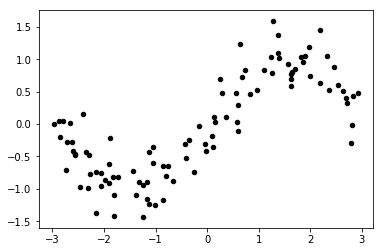

In [41]:
#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()

In [42]:
#为后续建模做准备：sklearn只接受二维以上数组作为特征矩阵的输入
X.shape

(100,)

In [43]:
X = X.reshape(-1, 1)
X

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504],
       [-2.26777059],
       [-0.02893854],
       [-2.79366887],
       [ 2.45592241],
       [-1.44732011],
       [ 0

In [44]:
#使用原始数据进行建模
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)

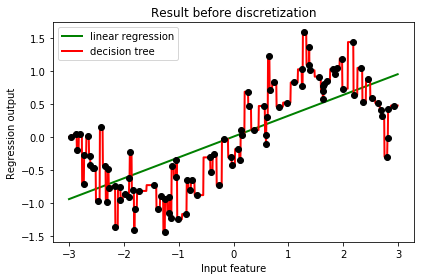

In [45]:
 #放置画布(画布和绘图命令必须在同一个框里面)
fig, ax1 = plt.subplots(1) 

#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) 

#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
         label="decision tree") 

#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k') #其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()
#从这个图像来看，可以得出什么结果？

非线性模型来拟合线性模型很容易拟合成功，但是非常容易出现过拟合现象   
但是，若用线性模型来拟合非线性数据，效果会非常糟糕。

使用分箱的话，线性模型也会在非线性模型上有很好的表现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

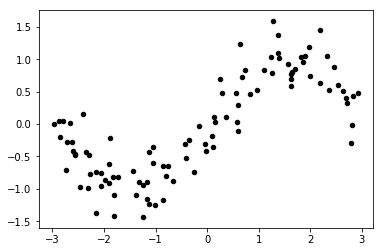

In [2]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数
#生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3 #random.normal，生成size个服从正态分布的随机数
#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()

In [3]:
#为后续建模做准备：sklearn只接受二维以上数组作为特征矩阵的输入
X.shape

(100,)

In [5]:
X = X.reshape(-1,1)

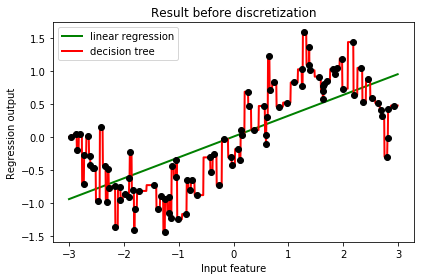

In [6]:
#使用原始数据进行建模
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y) 

#放置画布
fig, ax1 = plt.subplots(1) 

#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
         label="decision tree") #将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k') #其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()
#从这个图像来看，可以得出什么结果？

In [7]:
from sklearn.preprocessing import KBinsDiscretizer

#将数据分箱(将连续数据分成分类型)
enc = KBinsDiscretizer(n_bins=10 #分几类？
                       ,encode="onehot") #ordinal
X_binned = enc.fit_transform(X)
#encode模式"onehot"：使用做哑变量方式做离散化
#之后返回一个稀疏矩阵(m,n_bins)，每一列是一个分好的类别
#对每一个样本而言，它包含的分类（箱子）中它表示为1，其余分类中它表示为0 X.shape

In [8]:
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [9]:
#使用pandas打开稀疏矩阵
import pandas as pd
pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#我们将使用分箱后的数据来训练模型，在sklearn中，测试集和训练集的结构必须保持一致，否则报错
LinearR_ = LinearRegression().fit(X_binned, y)
LinearR_.predict(line) #line作为测试集

ValueError: shapes (1000,1) and (10,) not aligned: 1 (dim 1) != 10 (dim 0)

In [11]:
line.shape #测试

(1000, 1)

In [12]:
X_binned.shape #训练

(100, 10)

In [13]:
#因此我们需要创建分箱后的测试集：按照已经建好的分箱模型将line分箱
line_binned = enc.transform(line)

In [14]:
line_binned.shape #分箱后的数据是无法进行绘图的

(1000, 10)

In [15]:
line_binned

<1000x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

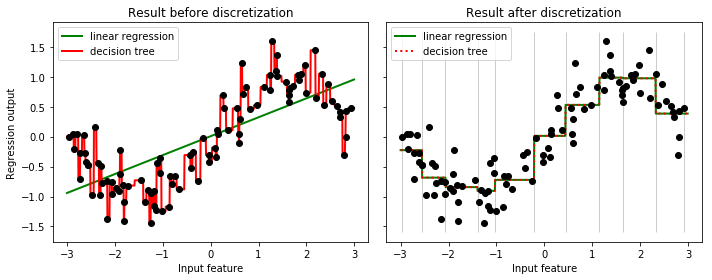

In [18]:
LinearR_.predict(line_binned).shape

#准备数据
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line) 

#将两张图像绘制在一起，布置画布
fig, (ax1, ax2) = plt.subplots(ncols=2
                               , sharey=True #让两张图共享y轴上的刻度
                               , figsize=(10, 4))
#在图1中布置在原始数据上建模的结果
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

#使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y) 

#进行预测，在图2中布置在分箱数据上进行预测的结果
ax2.plot(line #横坐标
        , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
        , linewidth=2
        , color='green'
        , linestyle='-'
        , label='linear regression')

ax2.plot(line, TreeR_.predict(line_binned), linewidth=2
         , color='red',linestyle=':', label='decision tree') 

#绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] #x轴
        , *plt.gca().get_ylim() #y轴的上限和下限
        , linewidth=1
        , alpha=.2) #将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, 'o', c='k') #其他绘图设定
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

通过分箱的方式，线性模型可以拟合非线性数据的分布。

箱子数如何影响模型的结果

0.9566086751329097


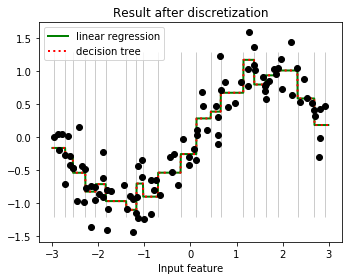

In [22]:
enc = KBinsDiscretizer(n_bins=20,encode="onehot")   # 实例化
X_binned = enc.fit_transform(X)    # 分箱后的特征矩阵
line_binned = enc.transform(line)   # 自创了line作为测试集  然后把line也进行分箱 --- 1000行10列
fig, ax2 = plt.subplots(1,figsize=(5,4))

LinearR_ = LinearRegression().fit(X_binned, y)    # 分箱好的特征矩阵进行训练
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

ax2.plot(line #横坐标
        , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
        , linewidth=2
        , color='green'
        , linestyle='-'
        , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')

ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

可见箱子数量能影响，不能太少，太多有过拟合的风险

选择最优箱子：交叉验证

In [1]:
from sklearn.model_selection import cross_val_score as CVS
import numpy as np

pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]

for i in binsrange:
    #实例化分箱类
    enc = KBinsDiscretizer(n_bins=i,encode="onehot")
    #转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    
    #建立模型
    LinearR_ = LinearRegression()
    
    #全数据集上的交叉验证
    cvresult = CVS(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
    
#绘制图像
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()

NameError: name 'KBinsDiscretizer' is not defined

多项式回归PolynomialFeatures

多项式变化。这是一种通过增加自变量上的次数，而将数据映射到高维空间的方法.   
多项式kernel在低维解释上帮助我们，多项式变化在高维呈现上帮助我们。它是作用于我们的      
特征矩阵的，他是对我们的数据进行调整，从而让这个数据被线性回归来进行拟合。

PolynomialFeatures参数：   
degree: 多项式中的次数，默认2   
interaction_only: bool值是否产生交互项，默认False   
include_bias: bool值，是否产出与截距项相乘的X0,默认True

In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [3]:
#如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1) 
X

array([[1],
       [2],
       [3]])

In [4]:
#二次多项式，参数degree控制多项式的次方
poly = PolynomialFeatures(degree=2)

In [5]:
#接口transform直接调用
X_ = poly.fit_transform(X)

In [7]:
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [8]:
X_.shape

(3, 3)

In [9]:
#三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

将低维特征转化成高维，对每个特征拟合出权重

In [10]:
#三次多项式，不带与截距项相乘的x0
PolynomialFeatures(degree=3,include_bias=False).fit_transform(X) 

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [11]:
#为什么我们会希望不生成与截距相乘的x0呢？
#对于多项式回归来说，我们已经为线性回归准备好了x0，但是线性回归并不知道
xxx = PolynomialFeatures(degree=3).fit_transform(X)

In [12]:
xxx.shape

(3, 4)

In [13]:
rnd = np.random.RandomState(42) #设置随机数种子

In [14]:
y = rnd.randn(3) 
y

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [17]:
#生成了多少个系数？
from sklearn.linear_model import LinearRegression
LinearRegression().fit(xxx,y).coef_

array([ 1.36002321e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [18]:
#查看截距
LinearRegression().fit(xxx,y).intercept_

1.2351711202036895

In [19]:
#发现问题了吗？线性回归并没有把多项式生成的x0当作是截距项
#所以我们可以选择：关闭多项式回归中的include_bias
#也可以选择：关闭线性回归中的fit_intercept
#生成了多少个系数？
LinearRegression(fit_intercpet=False).fit(xxx,y).coef_    # array([1.00596411,······])  四个数

TypeError: __init__() got an unexpected keyword argument 'fit_intercpet'

In [20]:
#查看截距
LinearRegression(fit_intercpet=False).fit(xxx,y).intercept_  # 0.0

TypeError: __init__() got an unexpected keyword argument 'fit_intercpet'

In [21]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [22]:
#尝试二次多项式
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

[x1,x2]-->[w0, x1, x2, x1x2, x1^2, x2^2]

y = w0+w1x1+w2x2+w3x1x2+w4x1^2+w5x2^2

In [23]:
#尝试三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

如果我们只要求高次项的话，x1x2 会是一个比x1^2 更好的高次项，因为x1x2 和x1 之间的   
共线性会比 x1^2与x1 之间的共线性好那么一点点（只是一点点），而我们多项式转化之后是   
需要使用线性回归模型来进行拟合的，就算机器学习中不是那么在意数据上的基本假设，但是   
太过分的共线性还是会影响到模型的拟合。因此sklearn中存在着控制是否要生成平方和立方   
项的参数interaction_only，默认为False，以减少共线性。

In [24]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [25]:
PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X) 
#对比之下，当interaction_only为True的时候，只生成交互项

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [26]:
#更高维度的原始特征矩阵
X = np.arange(9).reshape(3, 3) 
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [28]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [29]:
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.,  27.,
         36.,  45.,  48.,  60.,  75.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,   8.,  36.,  42.,  48.,  49.,  56.,  64., 216.,
        252., 288., 294., 336., 384., 343., 392., 448., 512.]])

In [30]:
X_ = PolynomialFeatures(degree=20).fit_transform(X)

In [31]:
X_.shape

(3, 1771)

In [ ]:
PolynomialFeatures(degree=2).fit_transform(X)
PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X)

#对比之下，当interaction_only为True的时候，只生成交互项
#更高维度的原始特征矩阵
X = np.arange(9).reshape(3, 3)
X

PolynomialFeatures(degree=2).fit_transform(X)
PolynomialFeatures(degree=3).fit_transform(X)
X_ = PolynomialFeatures(degree=20).fit_transform(X)

X_.shape

In [32]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np

In [33]:
rnd = np.random.RandomState(42) 

#设置随机数种子
X = rnd.uniform(-3, 3, size=100) 
y = np.sin(X) + rnd.normal(size=len(X)) / 3

#将X升维，准备好放入sklearn中 

X = X.reshape(-1,1) 
#创建测试数据，均匀分布在训练集X的取值范围内的一千个点

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) 

In [37]:
#原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y) 

#对训练数据的拟合
LinearR.score(X,y) 

0.5361526059318595

In [36]:
#对测试数据的拟合
LinearR.score(line,np.sin(line))

0.6800102369793312

In [38]:
#多项式拟合，设定高次项
d=5 

#进行高此项转换
poly = PF(degree=d)
X_ = poly.fit_transform(X)
line_ = PF(degree=d).fit_transform(line) 

#训练数据的拟合
LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_,y) 

0.8561679370344799

In [39]:
#测试数据的拟合
LinearR_.score(line_,np.sin(line))

0.9868904451787955

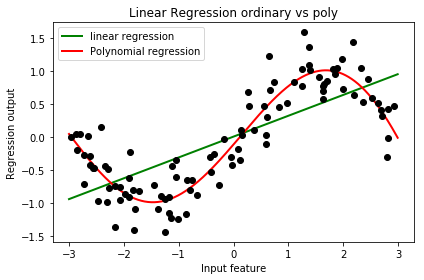

In [41]:
import matplotlib.pyplot as plt

d=5 #和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line) #放置画布
fig, ax1 = plt.subplots(1) #将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green'
             ,label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red'
        ,label="Polynomial regression") #将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k') #其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()
#来一起鼓掌，感叹多项式回归的神奇
#随后可以试试看较低和较高的次方会发生什么变化
#d=2
#d=20

多项式回归的可解释性

随着维数的增加，我们无法看出曾维后的特征是由之前的什么特征组成的，不过，多项式回归的可解释性依然存在   
我们可以使用接口---get_feature_names来调用生成的新特征举证的各个特征上的名称，以便帮助我们解释模型。

In [42]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [43]:
poly = PolynomialFeatures(degree=5).fit(X)

In [44]:
#重要接口get_feature_names
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [45]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
housevalue = fch()

In [46]:
X = pd.DataFrame(housevalue.data)
y = housevalue.target

In [47]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [48]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]


In [50]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [51]:
poly = PolynomialFeatures(degree=2).fit(X,y)

In [52]:
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [54]:
X_ = poly.transform(X) 

In [55]:
#在这之后，我们依然可以直接建立模型，然后使用线性回归的coef_属性来查看什么特征对标签的影响最大
reg = LinearRegression().fit(X_,y)

In [57]:
coef = reg.coef_

In [58]:
coef

array([ 5.91954144e-08, -1.12430256e+01, -8.48898556e-01,  6.44105937e+00,
       -3.15913307e+01,  4.06090679e-04,  1.00386233e+00,  8.70568191e+00,
        5.88063275e+00, -3.13081213e-02,  1.85994801e-03,  4.33020400e-02,
       -1.86142308e-01,  5.72831453e-05, -2.59019453e-03, -1.52505718e-01,
       -1.44242944e-01,  2.11725349e-04, -1.26218993e-03,  1.06115045e-02,
        2.81885223e-06, -1.81716949e-03, -1.00690374e-02, -9.99950183e-03,
        7.26947766e-03, -6.89064376e-02, -6.82365529e-05,  2.68878839e-02,
        8.75089946e-02,  8.22890394e-02,  1.60180956e-01,  5.14263995e-04,
       -8.71911388e-02, -4.37043033e-01, -4.04150609e-01,  2.73779343e-09,
        1.91426754e-05,  2.29529854e-05,  1.46567766e-05,  8.71561033e-05,
        2.13344592e-02,  1.62412938e-02,  6.18867357e-02,  1.08107173e-01,
        3.99077351e-02])

In [59]:
[*zip(poly.get_feature_names(X.columns),reg.coef_)]

[('1', 5.919541435538823e-08),
 ('住户收入中位数', -11.243025626342437),
 ('房屋使用年代中位数', -0.8488985558284562),
 ('平均房间数目', 6.4410593651213635),
 ('平均卧室数目', -31.591330651295365),
 ('街区人口', 0.00040609067929028186),
 ('平均入住率', 1.003862327021211),
 ('街区的纬度', 8.705681910190394),
 ('街区的经度', 5.8806327457107965),
 ('住户收入中位数^2', -0.0313081213151669),
 ('住户收入中位数 房屋使用年代中位数', 0.0018599480067008538),
 ('住户收入中位数 平均房间数目', 0.043302039980649264),
 ('住户收入中位数 平均卧室数目', -0.18614230762148926),
 ('住户收入中位数 街区人口', 5.728314525856295e-05),
 ('住户收入中位数 平均入住率', -0.0025901945279693736),
 ('住户收入中位数 街区的纬度', -0.15250571773355712),
 ('住户收入中位数 街区的经度', -0.1442429442847879),
 ('房屋使用年代中位数^2', 0.00021172534934901734),
 ('房屋使用年代中位数 平均房间数目', -0.001262189925797411),
 ('房屋使用年代中位数 平均卧室数目', 0.010611504463207522),
 ('房屋使用年代中位数 街区人口', 2.818852232910943e-06),
 ('房屋使用年代中位数 平均入住率', -0.0018171694880040896),
 ('房屋使用年代中位数 街区的纬度', -0.010069037386845982),
 ('房屋使用年代中位数 街区的经度', -0.009999501833041565),
 ('平均房间数目^2', 0.00726947766112956),
 ('平均房间数目 平均卧

In [61]:
#放到dataframe中进行排序
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T

In [62]:
coeff.head()

,0,1
0,1,5.91954e-08
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
3,平均房间数目,6.44106
4,平均卧室数目,-31.5913


In [63]:
coeff.columns = ["feature","coef"]

In [65]:
coeff.sort_values(by="coef").head()

,feature,coef
4,平均卧室数目,-31.5913
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151


可以发现，不仅数据的可解释性还存在，我们还可以通过这样的手段做特征工程——特征创造。多   
项式帮助我们进行了一系列特征之间相乘的组合，若能够找出组合起来后对标签贡献巨大的特征，   
那我们就是创造了新的有效特征，对于任何学科而言发现新特征都是非常有价值的。

多项式天生就有着可以帮我我们做特征创造的优势

In [66]:
#顺便可以查看一下多项式变化之后，模型的拟合效果如何了
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)

In [67]:
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.6062326851998051

In [68]:
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_,y)
print("R2:{}".format(reg_.score(X_,y)))
print("time:{}".format(time()-time0))

R2:0.7450018099106768
time:2.701707363128662


In [69]:
#假设使用其他模型？
from sklearn.ensemble import RandomForestRegressor as RFR
time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X,y).score(X,y)))
print("time:{}".format(time()-time0))

R2:0.9740160185107811
time:26.68093967437744


随机森林虽然效果好，但是跑的太慢了，线性模型速度快，工程能力强